In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    """
    if len(point1) != len(point2):
        raise ValueError("Both points must have the same number of dimensions.")
    
    squared_differences = [(x - y) ** 2 for x, y in zip(point1, point2)]
    return math.sqrt(sum(squared_differences))

def plot_clusters(data, clusters, centroids, iteration, title, save_as=None):
    """
    Visualize the clusters and centroids at a given iteration.
    """
    plt.figure(figsize=(6, 6))
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    markers = ['o', 's', '^', 'D', '*']
    
    # Plot each cluster
    for i, (centroid, points) in enumerate(clusters.items()):
        points = np.array(points)
        if len(points) > 0:
            plt.scatter(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f'Cluster #{i+1}')
        
        # Plot centroids
        plt.scatter(centroid[0], centroid[1], color=colors[i % len(colors)], marker='x', s=200, linewidths=3, label=f'Centroid #{i+1}')
    
    # Annotate points
    for j, point in enumerate(data):
        plt.annotate(f'M{j+1}', (point[0], point[1]), textcoords="offset points", xytext=(5, 5), ha='center')
    
    plt.title(f"{title} (Iteration {iteration})")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    
    if save_as:
        plt.savefig(save_as, format='png')
    plt.show()

def kmeans_clustering(data, initial_centroids, max_iterations=100, visualize=False, save_plots=False):
    """
    Perform K-means clustering for 2D data with visualization support.
    """
    current_centroids = copy.deepcopy(initial_centroids)
    all_iterations = []

    for i in range(max_iterations):
        ##################################################################
        # Form K clusters by assigning all points to the closest centroid 
        clusters = {tuple(c): [] for c in current_centroids}

        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in current_centroids]
            closest_centroid = current_centroids[np.argmin(distances)]
            clusters[tuple(closest_centroid)].append(point)
        
        # Save iteration data
        all_iterations.append((copy.deepcopy(clusters), copy.deepcopy(current_centroids)))

        # Visualize if needed
        if visualize:
            plot_clusters(data, clusters, current_centroids, i+1, "Clustering", save_as=f"iteration_{i+1}.png" if save_plots else None)

        #############################################################
        # Recompute the centroid of each cluster using `mean` method
        new_centroids = []
        for centroid in clusters.keys():
            if clusters[centroid]:
                new_centroids.append(list(np.mean(clusters[centroid], axis=0)))
            else:
                new_centroids.append(list(centroid))  # Keep unchanged if no points assigned

        ######################################################################################
        # If the current_centroid tends to converge to the new_centroids, break the iteration
        if np.allclose(current_centroids, new_centroids):
            break

        current_centroids = new_centroids

    sse = sum(
        sum(euclidean_distance(point, centroid) ** 2 for point in points)
        for centroid, points in clusters.items()
    )

    return current_centroids, clusters, sse, all_iterations

In [65]:
# Exercice 1
data = [[1], [2], [18], [20], [31]]  # 1D Data

print("Scenario 1 (1D):")
centroids, clusters, sse, all_iterations = kmeans_clustering(data, initial_centroids=[[1], [2], [18]])
print(f"Final Centroids: {centroids}")
print(f"SSE: {sse}")
print(f"Number Iterations: {len(all_iterations)}")

print()

print("Scenario 2 (1D):")
centroids, clusters, sse, all_iterations = kmeans_clustering(data, initial_centroids=[[18], [20], [31]])
print(f"Final Centroids: {centroids}")
print(f"SSE: {sse}")
print(f"Number Iterations: {len(all_iterations)}")

Scenario 1 (1D):
Final Centroids: [[np.float64(1.0)], [np.float64(2.0)], [np.float64(23.0)]]
SSE: 98.0
Number Iterations: 2

Scenario 2 (1D):
Final Centroids: [[np.float64(1.5)], [np.float64(19.0)], [np.float64(31.0)]]
SSE: 2.5
Number Iterations: 3


In [66]:
# Exercice 2
data = [[2], [4], [6], [12], [24], [30]]

# Test (a): Initial centroids = [[2], [6]]
print("Test (a):")
centroids_a, clusters_a, sse_a, all_iterations = kmeans_clustering(data, initial_centroids=[[2], [6]])
print(f"Final Centroids: {centroids_a}")
print(f"SSE: {sse}")
print(f"Number Iterations: {len(all_iterations)}")

# Test (b): Initial centroids = [[12], [24]]
print("Test (b):")
centroids_b, clusters_b, sse_b, all_iterations = kmeans_clustering(data, initial_centroids=[[12], [24]])
print(f"Final Centroids: {centroids_a}")
print(f"SSE: {sse}")
print(f"Number Iterations: {len(all_iterations)}")

Test (a):
Final Centroids: [[np.float64(6.0)], [np.float64(27.0)]]
SSE: 2.5
Number Iterations: 4
Test (b):
Final Centroids: [[np.float64(6.0)], [np.float64(27.0)]]
SSE: 2.5
Number Iterations: 2


Test Case 1: Initial Centroids = [[-2, 3], [-2, 1]]


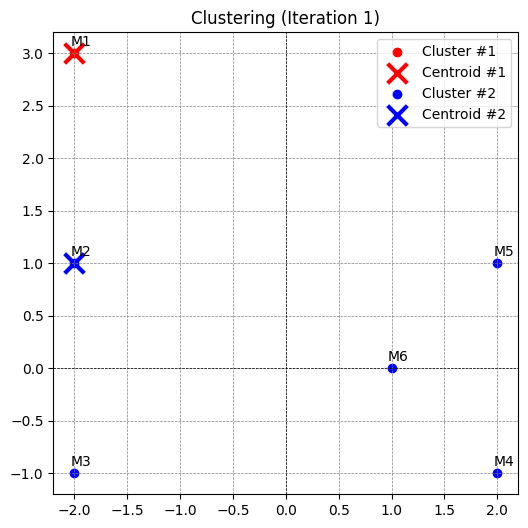

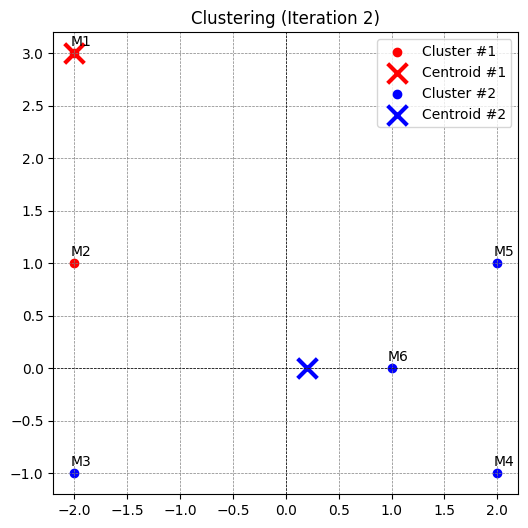

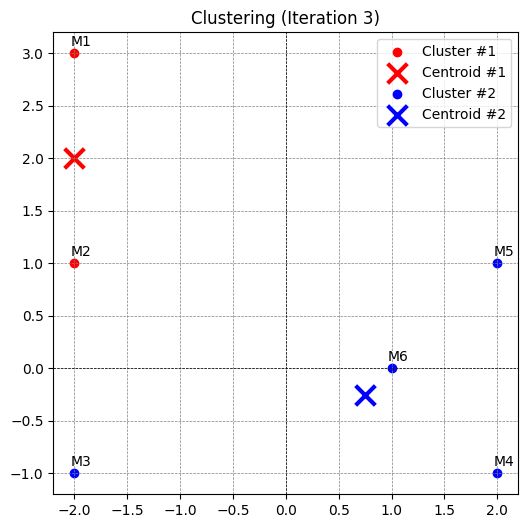


Test Case 2: Initial Centroids = [[2, -1], [1, 0]]


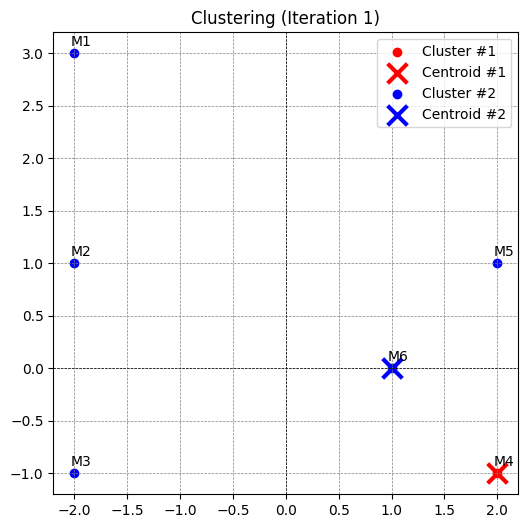

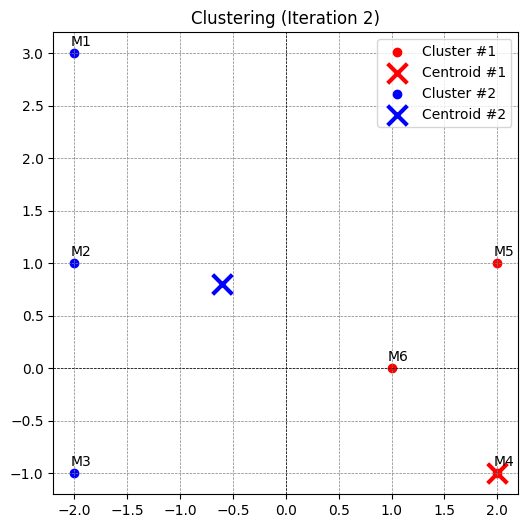

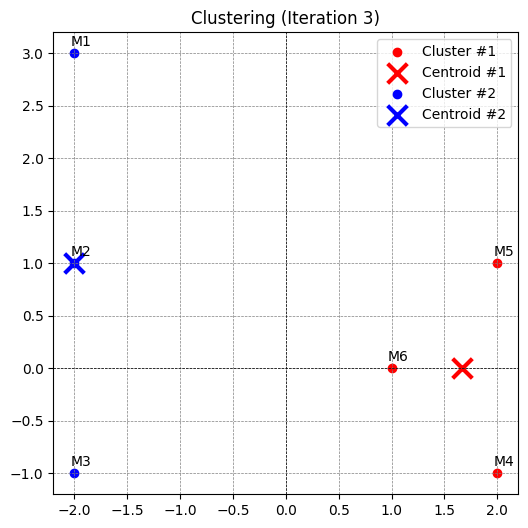

([[np.float64(1.6666666666666667), np.float64(0.0)],
  [np.float64(-2.0), np.float64(1.0)]],
 {(np.float64(1.6666666666666667), np.float64(0.0)): [[2, -1], [2, 1], [1, 0]],
  (np.float64(-2.0), np.float64(1.0)): [[-2, 3], [-2, 1], [-2, -1]]},
 10.666666666666668,
 [({(2, -1): [[2, -1]], (1, 0): [[-2, 3], [-2, 1], [-2, -1], [2, 1], [1, 0]]},
   [[2, -1], [1, 0]]),
  ({(np.float64(2.0), np.float64(-1.0)): [[2, -1], [2, 1], [1, 0]],
    (np.float64(-0.6), np.float64(0.8)): [[-2, 3], [-2, 1], [-2, -1]]},
   [[np.float64(2.0), np.float64(-1.0)], [np.float64(-0.6), np.float64(0.8)]]),
  ({(np.float64(1.6666666666666667), np.float64(0.0)): [[2, -1],
     [2, 1],
     [1, 0]],
    (np.float64(-2.0), np.float64(1.0)): [[-2, 3], [-2, 1], [-2, -1]]},
   [[np.float64(1.6666666666666667), np.float64(0.0)],
    [np.float64(-2.0), np.float64(1.0)]])])

In [67]:
# Exercice 3
data = [[-2, 3], [-2, 1], [-2, -1], [2, -1], [2, 1], [1, 0]]
initial_centroids_1 = [[-2, 3], [-2, 1]]
initial_centroids_2 = [[2, -1], [1, 0]]

# Test Case 1
print("Test Case 1: Initial Centroids =", initial_centroids_1)
kmeans_clustering(data, initial_centroids=initial_centroids_1, visualize=True, save_plots=False)

# Test Case 2
print("\nTest Case 2: Initial Centroids =", initial_centroids_2)
kmeans_clustering(data, initial_centroids=initial_centroids_2, visualize=True, save_plots=False)


In [69]:
from sklearn.cluster import KMeans
from numpy import array

print("=========== Exercice 1 ===========")
data1 = [[1], [2], [18], [20], [31]]
print(KMeans(n_clusters=3, n_init=1, init=array([[1], [2], [18]])).fit(data1).labels_)
print(KMeans(n_clusters=3, n_init=1, init=array([[18], [20], [31]])).fit(data1).labels_)

print("=========== Exercice 2 ===========")
data2 = [[2], [4], [6], [12], [24], [30]]
print(KMeans(n_clusters=2, n_init=1, init=array([[2], [6]])).fit(data2).labels_)
print(KMeans(n_clusters=2, n_init=1, init=array([[12], [24]])).fit(data2).labels_)

print("=========== Exercice 3 ===========")
data3 = data = [[-2, 3], [-2, 1], [-2, -1], [2, -1], [2, 1], [1, 0]]
print(KMeans(n_clusters=2, n_init=1, init=array([[-2, 3], [-2, 1]])).fit(data3).labels_)
print(KMeans(n_clusters=2, n_init=1, init=array([[2, -1], [1, 0]])).fit(data3).labels_)

[0 1 2 2 2]
[0 0 1 1 2]
[0 0 0 0 1 1]
[0 0 0 0 1 1]
[0 0 1 1 1 1]
[1 1 1 0 0 0]
